# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [2]:
#null hypothesis there is no difference in response rates between the new template and old.
H_0 = 0.05

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [3]:
# there is a 0.01 difference in response rate
H_1 = 0.06

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [1]:
from statsmodels.stats.power import TTestIndPower, TTestPower

In [5]:
# Calculate the required sample size
alpha = 0.05
power = 0.8
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=0.01/0.0475, alpha=alpha, power=power, alternative='larger')

279.6667468021971

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [9]:
import pandas as pd
import numpy as np

In [24]:
#Your code; plot power curves for the various alpha and effect size combinations



TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


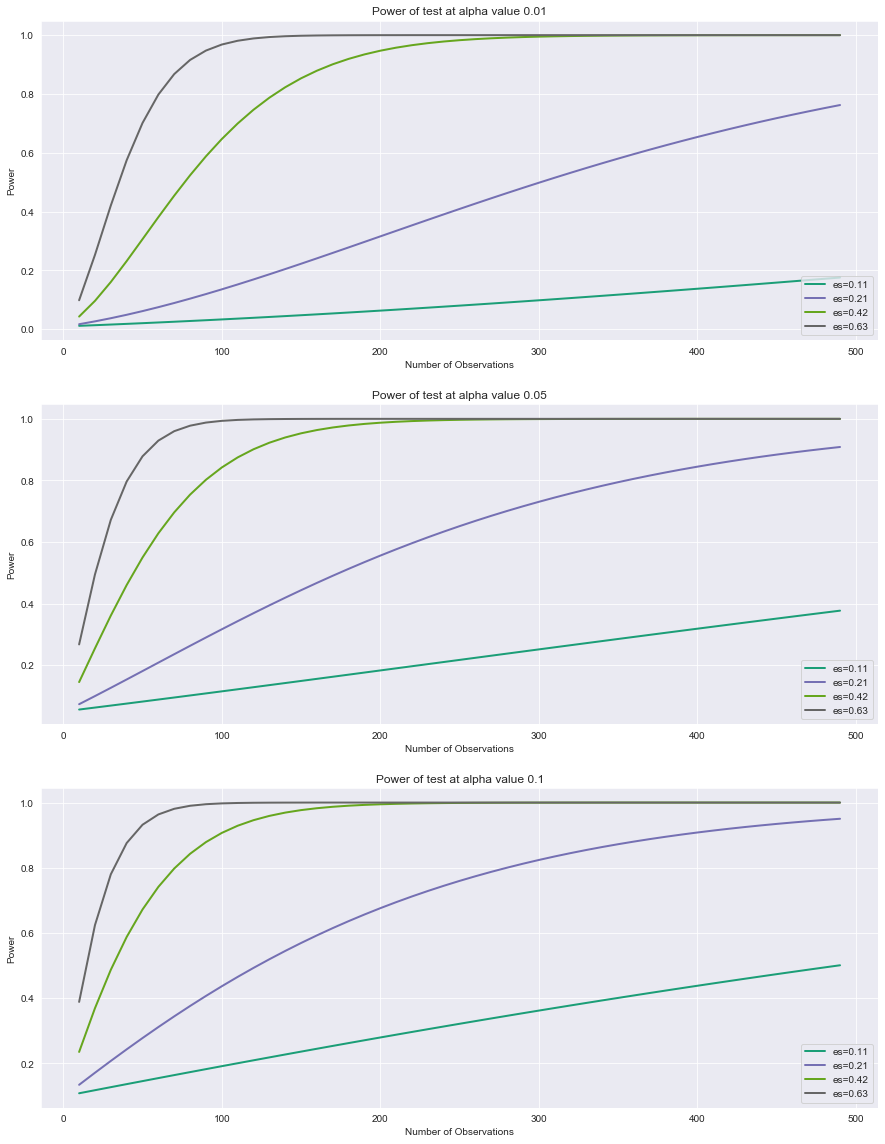

In [37]:
alphas = [0.01, 0.05, 0.1]
size_diff = np.array([0.005, 0.01, 0.02, 0.03])
effect_sizes = size_diff / 0.0475
sample_sizes = np.arange(10,500,10)
#create figure plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,20))
for n in range(len(alphas)):
    ax = axes[n]
    alpha = alphas[n]
    
    power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=alpha, ax=ax)
    ax.set_title("Power of test at alpha value {}".format(alpha))
    ax.set_ylabel('Power')

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

Sending to 200 people we can get a power level above 0.8, for all effect sizes 0.42 and above. Sending to 300-400 people, we can get a fairly good power level above 0.8 for alphas above 0.05 and an lower effect size of 0.21. The power is very low for effect sizes at 0.11 for all observations. So a change in 0.1 percent is not very useful, and could be due to chance.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.